# Task Difficulty Levels

This notebook demonstrates the different levels of difficulty for each of the construction tasks.

For further details, see the [Documentation](https://github.com/deepmind/dm_construction/blob/master/docs/index.md).

In [0]:
# Copyright 2020 DeepMind Technologies Limited
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Installation**

1. From the root of this repository, run `pip install .[demos]` to install both `dm_construction` and extra dependencies needed to run this notebook.
2. Install [ffmpeg](https://ffmpeg.org/):
  * Cross-platform with [Anaconda](https://docs.anaconda.com/anaconda/install/): `conda install ffmpeg`
  * Ubuntu: `apt-get install ffmpeg`
  * Mac with [Homebrew](https://brew.sh/): `brew install ffmpeg`

In [1]:
import matplotlib.pyplot as plt
import dm_construction

In [2]:
def show_difficulties(env_, difficulties=None):
  """Generate and plot episodes at each difficulty level."""
  if not difficulties:
    difficulties = range(0, env_.core_env.max_difficulty + 1)
  frames = []
  for difficulty in difficulties:
    _ = env_.reset(difficulty=difficulty, curriculum_sample=False)
    frames.append(env_.core_env.last_time_step.observation["RGB"].squeeze())

  base_size = 5
  num_frames = len(frames)
  _, axes = plt.subplots(
      1, num_frames, squeeze=False, figsize=(base_size*num_frames, base_size))

  for i, rgb_observation in enumerate(frames):
    ax = axes[0, i]
    ax.imshow(rgb_observation)
    ax.set_axis_off()
    ax.set_aspect("equal")
    if isinstance(difficulties[i], str):
      ax.set_title(difficulties[i])
    else:
      ax.set_title("difficulty = {}".format(difficulties[i]))

In [24]:
def show_rgb_observation(rgb_observation, size=5):
  """Plots a RGB observation, as returned from a Unity environment.

  Args:
    rgb_observation: numpy array of pixels
    size: size to set the figure
  """
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(rgb_observation)
  ax.set_axis_off()
  ax.set_aspect("equal")

def print_status(env_, time_step_):
  """Prints reward and episode termination information."""
  status = "r={}, p={}".format(time_step_.reward, time_step_.discount)
  if time_step_.discount == 0:
    status += " (reason: {})".format(env_.termination_reason)
  print(status)

## Load Environments

First we will load a copy of each environment. We can reuse the same underlying
Unity process for all of them, which makes loading a bit faster.

In [3]:
# Create a new Unity process. Use a higher res on the camera for nicer images.
unity_env = dm_construction.get_unity_environment(width=600, height=600)

# Create one copy of each environment.
envs = {}
env_names = [
    "marble_run", "covering_hard", "covering", "connecting", "silhouette"]
for task in env_names:
  envs[task] = dm_construction.get_environment(
      task, unity_environment=unity_env, curriculum_sample=None,
      difficulty=None)

## Silhouette

The difficulty levels of Silhouette involve increasing the number of targets, the number of obstacles, and the maximum height of the targets.

Generalization involves increasing the number of targets beyond what was seen during training.

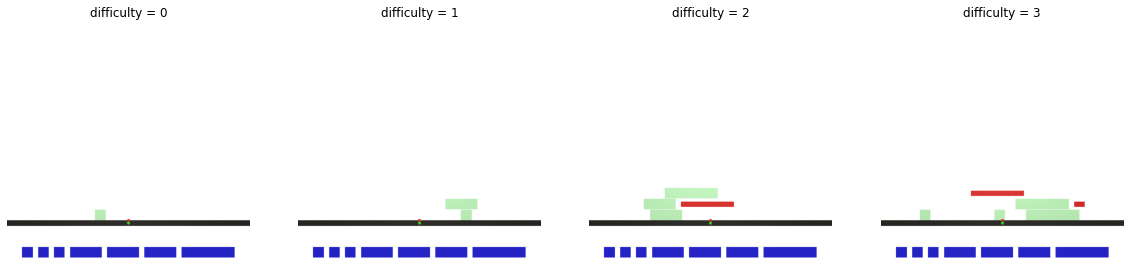

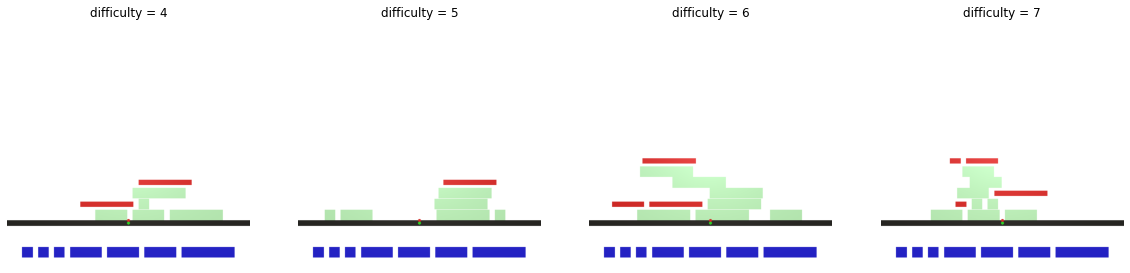

In [4]:
# Curriculum difficulties.
show_difficulties(envs["silhouette"], difficulties=[0, 1, 2, 3])
show_difficulties(envs["silhouette"], difficulties=[4, 5, 6, 7])

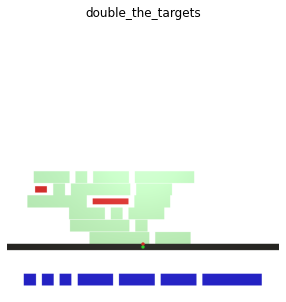

In [5]:
# Generalization.
show_difficulties(envs["silhouette"], difficulties=["double_the_targets"])

## Connecting

The difficulty levels in Connecting involve increasing the number of obstacles, the number of layers of obstacles, and the height of the targets.

Generalization in connecting involves having mixed heights of the targets, or adding an additional layer of obstacles (and also increasing the height of the targets).

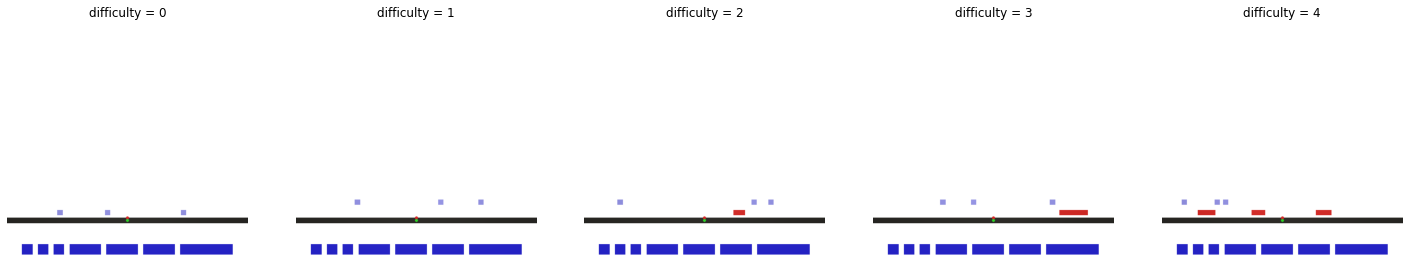

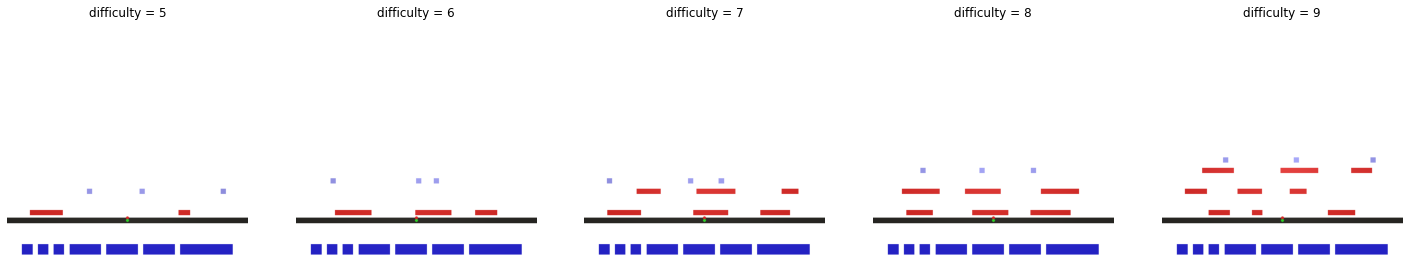

In [6]:
# Curriculum difficulties.
show_difficulties(envs["connecting"], difficulties=[0, 1, 2, 3, 4])
show_difficulties(envs["connecting"], difficulties=[5, 6, 7, 8, 9])

(Cathy: check observation/action space for connecting, how are targets encoded?)

In [45]:
timestep = envs["connecting"].reset(difficulty=7, curriculum_sample=False)
timestep.observation

{'nodes': array([[-6.65 , -2.1  ,  1.   ,  0.   ,  0.7  ,  0.7  ,  0.   ,  0.   ,
          0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
          0.   ,  0.   ],
        [-5.6  , -2.1  ,  1.   ,  0.   ,  0.7  ,  0.7  ,  0.   ,  0.   ,
          0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
          0.   ,  0.   ],
        [-4.55 , -2.1  ,  1.   ,  0.   ,  0.7  ,  0.7  ,  0.   ,  0.   ,
          0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
          0.   ,  0.   ],
        [-2.8  , -2.1  ,  1.   ,  0.   ,  2.1  ,  0.7  ,  0.   ,  0.   ,
          0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
          0.   ,  0.   ],
        [-0.35 , -2.1  ,  1.   ,  0.   ,  2.1  ,  0.7  ,  0.   ,  0.   ,
          0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
          0.   ,  0.   ],
        [ 2.1  , -2.1  ,  1.   ,  0.   ,  2.1  ,  0.7  ,  0.   ,  0.   ,
          0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  

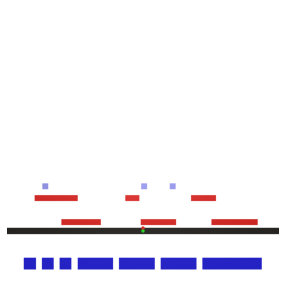

In [46]:
show_rgb_observation(envs["connecting"].core_env.last_time_step.observation["RGB"])

In [56]:
timestep.observation

{'nodes': array([[-6.650000e+00, -2.100000e+00,  1.000000e+00,  0.000000e+00,
          7.000000e-01,  7.000000e-01,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00],
        [-5.600000e+00, -2.100000e+00,  1.000000e+00,  0.000000e+00,
          7.000000e-01,  7.000000e-01,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00],
        [-4.550000e+00, -2.100000e+00,  1.000000e+00,  0.000000e+00,
          7.000000e-01,  7.000000e-01,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00],
        [-2.800000e+00, -2.100000e+00,  1.0

144
r=0.0, p=1.0


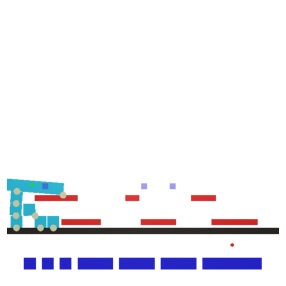

In [55]:
# Pick an edge.
obs = timestep.observation
moved_block = 6
#base_block = 7
base_block = len(obs["nodes"]) - 1
edge_index = list(
    zip(obs["senders"], obs["receivers"])).index((moved_block, base_block))
print(edge_index)

# Construct the action.
action = {
    "Index": edge_index,
    "sticky": 1,     # make it sticky
    "x_action": 10,   # place it to the left
}

timestep = envs["connecting"].step(action)
print_status(envs["connecting"], time_step)

# Get the image observation from the task environment.
show_rgb_observation(envs["connecting"].core_env.last_time_step.observation["RGB"])

(cathy: end task probing)

In [21]:
envs["connecting"].observation_spec()

{'nodes': Array(shape=(0, 18), dtype=dtype('float32'), name='nodes_spec'),
 'edges': Array(shape=(0, 1), dtype=dtype('float32'), name='edges_spec'),
 'globals': Array(shape=(1, 1), dtype=dtype('float32'), name='globals_spec'),
 'n_node': Array(shape=(1,), dtype=dtype('int32'), name='n_node_spec'),
 'n_edge': Array(shape=(1,), dtype=dtype('int32'), name='n_edge_spec'),
 'receivers': Array(shape=(0,), dtype=dtype('int32'), name='receivers_spec'),
 'senders': Array(shape=(0,), dtype=dtype('int32'), name='senders_spec')}

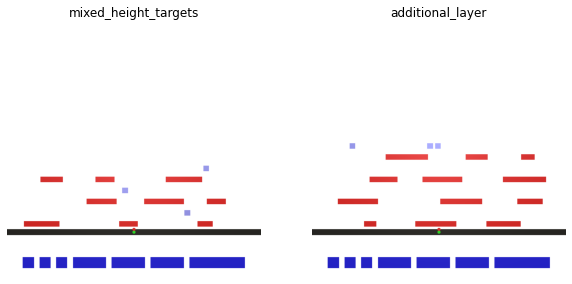

In [7]:
# Generalization.
show_difficulties(envs["connecting"], difficulties=["mixed_height_targets", "additional_layer"])

## Covering

The difficulty levels in the Covering task involves increasing the number of obstacles and the maximum height of the obstacles.

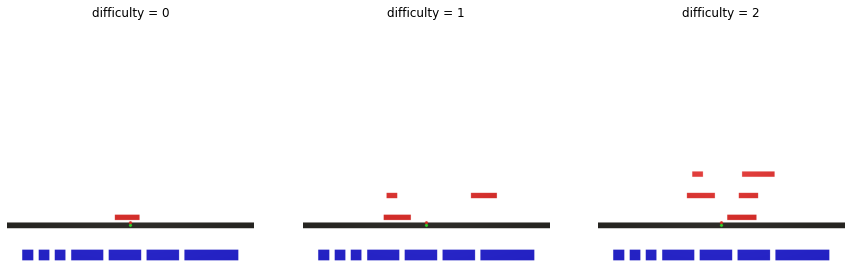

In [8]:
# Curriculum difficulties.
show_difficulties(envs["covering"])

## Covering Hard

Like in Covering, the difficulty levels involve increasing the number of obstacles and the maximum height of the obstacles.

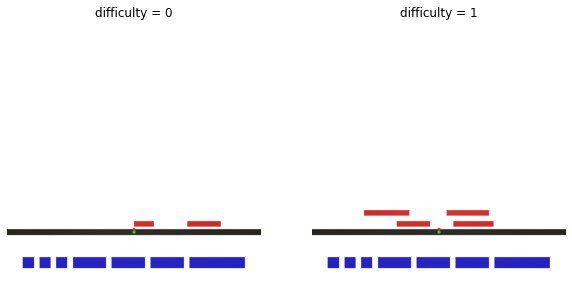

In [9]:
# Curriculum difficulties.
show_difficulties(envs["covering_hard"])

(Cathy probe obs/action space)

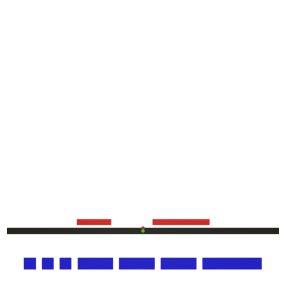

In [60]:
import numpy as np
np.random.seed(1234)
timestep = envs["covering_hard"].reset(difficulty=0, curriculum_sample=False)
show_rgb_observation(envs["covering_hard"].core_env.last_time_step.observation["RGB"])

In [62]:
envs["covering_hard"].observation_spec()

{'nodes': Array(shape=(0, 18), dtype=dtype('float32'), name='nodes_spec'),
 'edges': Array(shape=(0, 1), dtype=dtype('float32'), name='edges_spec'),
 'globals': Array(shape=(1, 1), dtype=dtype('float32'), name='globals_spec'),
 'n_node': Array(shape=(1,), dtype=dtype('int32'), name='n_node_spec'),
 'n_edge': Array(shape=(1,), dtype=dtype('int32'), name='n_edge_spec'),
 'receivers': Array(shape=(0,), dtype=dtype('int32'), name='receivers_spec'),
 'senders': Array(shape=(0,), dtype=dtype('int32'), name='senders_spec')}

73
r=0.0, p=1.0


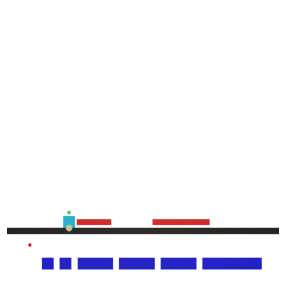

In [63]:
# Pick an edge.
obs = timestep.observation
moved_block = 0
base_block = 7
#base_block = len(obs["nodes"]) - 1
edge_index = list(
    zip(obs["senders"], obs["receivers"])).index((moved_block, base_block))
print(edge_index)

# Construct the action.
action = {
    "Index": edge_index,
    "sticky": 1,     # make it sticky
    "x_action": 0,   # place it to the left
}

timestep = envs["covering_hard"].step(action)
print_status(envs["covering_hard"], time_step)

# Get the image observation from the task environment.
show_rgb_observation(envs["covering_hard"].core_env.last_time_step.observation["RGB"])

In [64]:
timestep.observation

{'nodes': array([[-4.348708e+00,  3.644565e-01,  9.999998e-01,  5.495647e-04,
          7.000000e-01,  7.000000e-01,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  1.000000e+00,  1.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
          0.000000e+00,  0.000000e+00],
        [-5.600000e+00, -2.100000e+00,  1.000000e+00,  0.000000e+00,
          7.000000e-01,  7.000000e-01,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00],
        [-4.550000e+00, -2.100000e+00,  1.000000e+00,  0.000000e+00,
          7.000000e-01,  7.000000e-01,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
          0.000000e+00,  0.000000e+00],
        [-2.800000e+00, -2.100000e+00,  1.0

## Marble Run

The difficulty levels in Marble Run involve the distance between the ball and the goal, the number of obstacles, and the height of the target.

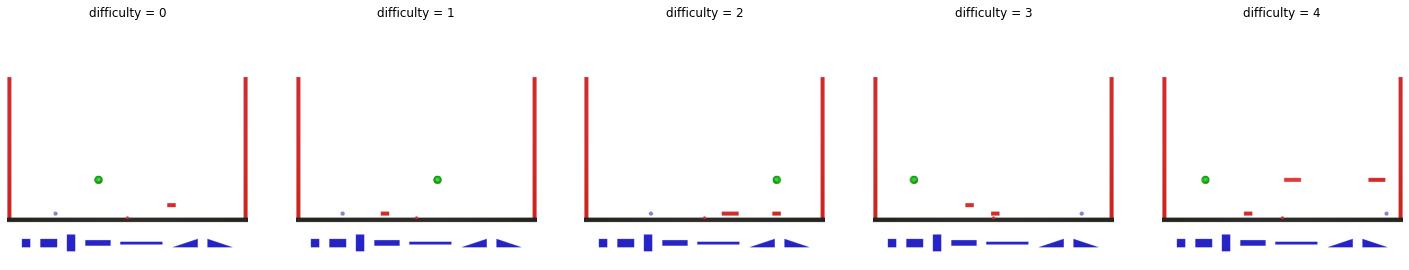

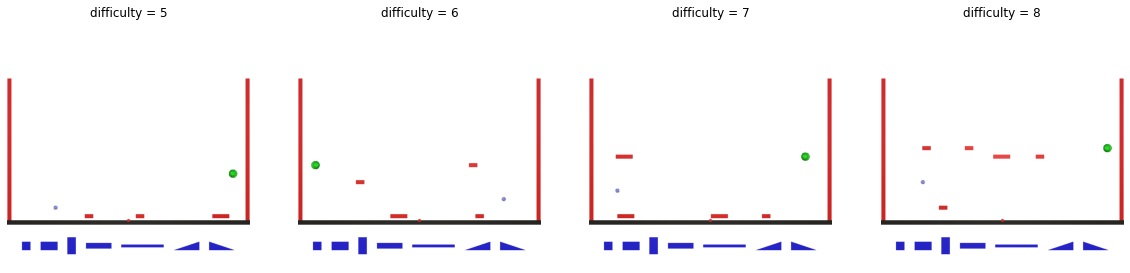

In [10]:
# Curriculum difficulties.
show_difficulties(envs["marble_run"], difficulties=[0, 1, 2, 3, 4])
show_difficulties(envs["marble_run"], difficulties=[5, 6, 7, 8])

## Close Environments

The Unity environment won't get garbage collected since it is actually running as a separate process, so make sure to always shut down all environments after they are finished running.

In [65]:
for name, env in envs.items():
  print("Closing '{}'".format(name))
  env.close()

Closing 'marble_run'
Closing 'covering_hard'
Closing 'covering'
Closing 'connecting'
Closing 'silhouette'
